In [1]:
# !pip install ipywidgets widgetsnbextension
# !jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [2]:
import pandas as pd
from ipywidgets import widgets
from ipywidgets import interactive
import ipywidgets as widgets

## 0 Data
---
Description — This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. The attributes are a mix of numeric and categorical variables.

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1 Widgets Introduction
---
Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

You can use widgets to build interactive GUIs for your notebooks.

In [4]:
import ipywidgets as widgets

#### (1) Using widgets

In [5]:
w = widgets.IntSlider()
w.value = 10
display(w)

IntSlider(value=10)

#### (2) Setting the initial values of widget properties

In [6]:
widgets.Text(value = 'Input Here', disabled = True)

Text(value='Input Here', disabled=True)

#### (3) Liking two similar widgets

In [7]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)
link = widgets.jslink((a, 'value'), (b, 'value'))
link.unlink() # unlink widgets

FloatText(value=0.0)

FloatSlider(value=0.0)

## 2 Widget List

### 2.1 Numeric Widgets

#### (1) IntSlider
---

- The slider is displayed with a specified, initial `value`. Lower and upper bounds are defined by `min` and `max`, and the value can be incremented according to the `step` parameter.
- The slider's label is defined by `description` parameter
- The slider's `orientation` is either 'horizontal'(default) or 'vertical'.
- `readout` displays the current value of the slider next to it, the options are True(default).
- `readout_format` specifies the format function used to represent slider value, the default is '.2f'.

In [8]:
widgets.IntSlider(
    value = 7,
    min = 0, max = 10, step = 1,
    description = 'Test:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    read_format = 'd')

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

#### (2) FloatSlider

In [9]:
widgets.FloatSlider(
    value = 7.5,
    min = 0, max = 10.0, step = 0.1,
    description = 'Test:', disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True, read_format = '.1f')

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0)

#### (3) FloatLogSlider

- The `FloatLogSlider` has a log scale, `min` and `max` refer to the minimum and maximum exponents of the `base`, and the `value` refers to the actual value of the slider.

In [10]:
widgets.FloatLogSlider(
    value = 10, base = 10,
    min = -10, max = 10, step = 0.2,
    discription = 'Log Slider')

FloatLogSlider(value=10.0, max=10.0, min=-10.0, step=0.2)

#### (4) IntText and FloatText

In [11]:
widgets.IntText(
    value = 7, description = 'Any:', disabled = False)

IntText(value=7, description='Any:')

In [12]:
widgets.FloatText(
    value = 7.5, description = 'Any:', disabled = False)

FloatText(value=7.5, description='Any:')

### 2.2 Bolean Widgets

#### (1) ToggleButton

In [13]:
widgets.ToggleButton(
    value = False, discription = 'Click me',
    disabled = False, button_style = '',  tooltip = 'Description', icon = 'check')

ToggleButton(value=False, icon='check', tooltip='Description')

#### (2) Checkbox

- `indent` parameter places an indented checkbox, aligned with other controls.

In [14]:
widgets.Checkbox(
    value = False, description = 'Check me',
    disabled = False, indent = False )

Checkbox(value=False, description='Check me', indent=False)

### 2.3 Selection Widgets

#### (1) Dropdown

In [15]:
widgets.Dropdown(
    options = ['1', '2', '3'], value = '2',
    description = 'Number:', disabled = False)

# diaplaying the words 'One', 'Two', 'Three' as the dropdown choices but returning the values 1,2,3
# widgets.Dropdown(
    # options = [('One', 1), ('Two', 2), ('Three', 3)], value = '2',
    # description = 'Number:', disabled = False)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [16]:
widgets.Dropdown(
    options = [('Choice 1', 100), ('Choice 2', 200)],
    description = 'Choice')

Dropdown(description='Choice', options=(('Choice 1', 100), ('Choice 2', 200)), value=100)

#### (2) RadioButtons

In [17]:
widgets.RadioButtons(
    options = ['pepperoni', 'pineapple', 'anchovies'], value = 'pineapple',
#   layout = {'width': 'max-content'}, # If the items' names are long
    description='Pizza topping:', disabled = False)

RadioButtons(description='Pizza topping:', index=1, options=('pepperoni', 'pineapple', 'anchovies'), value='pi…

### 2.4 String Widgets

In [18]:
widgets.Text(
    value = 'Input Here', placeholder = 'Type something',
    description = 'String:', disabled = False)

Text(value='Input Here', description='String:', placeholder='Type something')

### 2.5 File Upload

#### (1) CSV

In [19]:
file_upload = widgets.FileUpload(
                accept = '',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
                multiple = False)  # True to accept multiple files upload else False

In [21]:
display(file_upload) # upload cvs
file1 = file_upload.value[0]
file1

FileUpload(value=({'name': 'insurance.csv', 'type': 'text/csv', 'size': 55628, 'content': <memory at 0x10f35bd…

{'name': 'insurance.csv',
 'type': 'text/csv',
 'size': 55628,
 'content': <memory at 0x10f35bdc0>,
 'last_modified': datetime.datetime(2020, 2, 16, 12, 43, 54, tzinfo=datetime.timezone.utc)}

In [22]:
# convert the file into a Pandas dataframe
import io
import pandas as pd
pd.read_csv(io.BytesIO(file1.content)).head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3 Using Interact
---
The `interact` function automatically creates user interface (UI) controls for exploring code and data interactively.

### 3.1 Basic `interact`
 - if pass in n, it generates an integer-valued slider control with a range of $[-n,+3*n]$.

In [23]:
from ipywidgets import interact

In [24]:
def f(x):
    return x

In [25]:
interact(f, x = 10) # -10 ~ 30

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [26]:
# If you pass True or False, interact will generate a checkbox
interact(f, x = True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [27]:
# If you pass a string, interact will generate a text box.
interact(f, x = 'Hi')

interactive(children=(Text(value='Hi', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

### 3.2 Widget Abbreviations

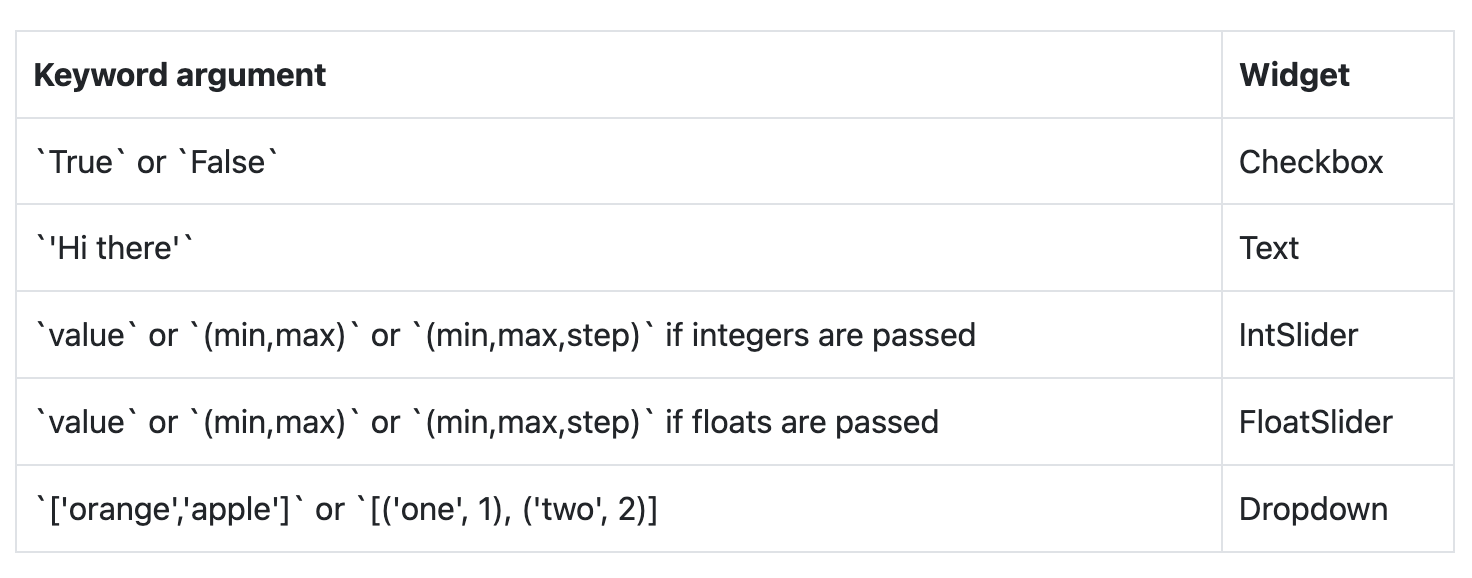

### 3.3 Basic `interactive`

In [28]:
from IPython.display import display

In [29]:
def f(a,b):
    display(a + b) # display the return value
    return a+b

In [30]:
interactive(f, a = 10, b = 20)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

## Practice Example

In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1 Numeric Widgets ( Slider )

**e.g 1** retrieve rows with 5 children

In [32]:
# defined a function named f that takes in one argument — children
# the function will query the dataframe and display the result
def f(children):
    display(data.query(f'children == {children}')) 

In [33]:
interact(f, children = 5)

interactive(children=(IntSlider(value=5, description='children', max=15, min=-5), Output()), _dom_classes=('wi…

<function __main__.f(children)>

**e.g 2** retrieve rows with age within a certain range

In [34]:
def f(age):
    display(data.query(f'age == {age}'))

In [35]:
interact(f, age = (data['age'].min(), data['age'].max()))

interactive(children=(IntSlider(value=41, description='age', max=64, min=18), Output()), _dom_classes=('widget…

<function __main__.f(age)>

### 2 Bolean Widgets

#### Checkbox

**e.g** retrive rows with smoker = yes or no

In [36]:
YES, NO = 'yes', 'no'

In [37]:
def f(smoker):
    display(data.query(f'smoker == "{YES if smoker == True else NO}"'))

In [38]:
interact(f, smoker = True)

interactive(children=(Checkbox(value=True, description='smoker'), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(smoker)>

### 3 Selection Widgets

#### 3.1 DropDown Widget

**e.g 1** retrive rows with different regions

In [39]:
def f(region):
    display(data.query(f'region == "{region}"'))

In [40]:
interact(f, region = data['region'].unique())

interactive(children=(Dropdown(description='region', options=('southwest', 'southeast', 'northwest', 'northeas…

<function __main__.f(region)>

**e.g 2** retrive rows with different regions & all regions

In [41]:
regions = [(i.capitalize(),i) for i in data['region'].unique()]
regions.append(('All Regions', '@*'))
regions

[('Southwest', 'southwest'),
 ('Southeast', 'southeast'),
 ('Northwest', 'northwest'),
 ('Northeast', 'northeast'),
 ('All Regions', '@*')]

In [42]:
def f(region):
    display(data.query(f'region.str.contains("{region}")'))

In [43]:
interact(f, region = regions)

interactive(children=(Dropdown(description='region', options=(('Southwest', 'southwest'), ('Southeast', 'south…

<function __main__.f(region)>

#### 3.2 RadioButtons Widget

**e.g** retrive rows with smoker = yes or no (select from a predetermined list of possible values)

In [44]:
def f(smoker):
    display(data.query(f'smoker == "{smoker}"'))

In [45]:
interact(f, smoker = widgets.RadioButtons(options = ["yes", "no"], value = "no"))

interactive(children=(RadioButtons(description='smoker', index=1, options=('yes', 'no'), value='no'), Output()…

<function __main__.f(smoker)>

### 4 String Widgets

#### Text Widget

**e.g** retrive rows with different regions by typing

In [46]:
def f(region):
    display(data.query(f'region.str.contains("{region}")'))

In [47]:
interact(f, region = '') # continuous update

interactive(children=(Text(value='', description='region'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(region)>

In [48]:
interact(f, region = widgets.Text('', continuous_update = False))

interactive(children=(Text(value='', continuous_update=False, description='region'), Output()), _dom_classes=(…

<function __main__.f(region)>

### 5 Interactive Function

- allows to pass in multiple values to create multiple widgets

**e.g** retrieve rows with certain criteria

In [49]:
report_output = widgets.Output()
display(report_output)

def f(age, bmi, children, region, sex, smoker):
    filtered = data.query(f'age >= {age} and bmi >= {bmi} and smoker == "{smoker}" and region.str.contains("{region}") and sex=="{sex}" and children=={children}')
    with report_output:
        report_output.clear_output()
        display(filtered)
   
regions = [(i.capitalize(),i) for i in data['region'].unique()]
regions.append(('All Regions','@*'))

Output()

In [50]:
interactive(f, 
            {'manual': True}, # avoid refreshing the dataframe until the user wants to see the updated dataframe
            age = (data['age'].min(), data['age'].max()), 
            bmi = (data['bmi'].min(), data['bmi'].max()), 
            children = (data['children'].min(), data['children'].max()),
            region = regions,           
            sex = widgets.RadioButtons(options = ["female", "male"], value = "female"),
            smoker = widgets.RadioButtons(options = ["yes", "no"], value = "no"),             
           )

interactive(children=(IntSlider(value=41, description='age', max=64, min=18), FloatSlider(value=34.545, descri…